<a href="https://colab.research.google.com/github/Hassanat-Awodipe/triage-app/blob/main/TriageModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Package Version Verification


In [ ]:
# Package                   Version
# ------------------------- -----------
# streamlit                 1.50.0
# joblib                    1.5.2
# scikit-learn              1.7.2
# pandas                    2.3.3
# numpy                     2.3.4
# seaborn 0.13.2
# matplotlib                3.10.7
# shap                      0.49.1
# plotly                    6.3.1

In [ ]:
!pip install scikit-learn==1.7.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 21.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
import joblib
import sklearn
import pandas
import numpy
import seaborn
import matplotlib
import shap
import plotly
print('joblib', joblib.__version__)
print('scikit-learn', sklearn.__version__)
print('pandas', pandas.__version__)
print('numpy', numpy.__version__)
print('seaborn', seaborn.__version__)
print('matplotlib', matplotlib.__version__)
print('shap', shap.__version__)
print('plotly', plotly.__version__)

joblib 1.5.2
scikit-learn 1.7.2
pandas 2.2.2
numpy 2.0.2
seaborn 0.13.2
matplotlib 3.10.0
shap 0.49.1
plotly 5.24.1


# Data Import

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import shap

In [2]:
df = pd.read_csv('triage_preprocessed(6).csv')
df.head()

,age,sex,active_bleeding,resp_rate,heart_rate,systolic_bp,diastolic_bp,temperature,oxygen_sat,pregnancy,...,chief_complaint_Injury,chief_complaint_Pregnancy-related complication,chief_complaint_Psychiatric/behavioral emergency,chief_complaint_Seizure or loss of consciousness,chief_complaint_Vomiting or diarrhea,chief_complaint_Weakness or fatigue,AVPU_scale_Pain,AVPU_scale_Unresponsive,AVPU_scale_Voice,Triage_Category
0,58,0,0,25,103,136,99,37,89,0,...,0,0,0,0,0,0,0,0,1,0
1,24,0,0,25,107,125,93,37,88,0,...,0,0,1,0,0,0,0,0,0,0
2,50,0,0,24,80,112,86,37,90,0,...,0,0,0,0,0,1,1,0,0,0
3,32,1,1,18,88,139,88,38,85,1,...,0,1,0,0,0,0,0,1,0,0
4,45,1,0,20,101,118,92,37,89,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 27 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   age                                               600 non-null    int64
 1   sex                                               600 non-null    int64
 2   active_bleeding                                   600 non-null    int64
 3   resp_rate                                         600 non-null    int64
 4   heart_rate                                        600 non-null    int64
 5   systolic_bp                                       600 non-null    int64
 6   diastolic_bp                                      600 non-null    int64
 7   temperature                                       600 non-null    int64
 8   oxygen_sat                                        600 non-null    int64
 9   pregnancy                                  

In [3]:
triage = df.copy()

In [4]:
# 3. Separate features and target
features = triage.drop(columns=['Triage_Category'])
target = triage['Triage_Category']

# 6. Train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

# RF

In [ ]:
# Train RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


# Predictions on train and test
y_pred_train = rf_model.predict(X_train)
y_pred = rf_model.predict(X_test)

# Evaluation on Train data
cm_train = confusion_matrix(y_train, y_pred_train)
report_train = classification_report(y_train, y_pred_train)

# Evaluation on Test data
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print("Model Evaluation on Training Set")
print(f"Confusion Matrix:\n{cm_train}")
print(f"Classification Report:\n{report_train}")
print("-"*80)
print("Random Forest (RF) Classifier: Model Evaluation on Testing Set")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")

Model Evaluation on Training Set
Confusion Matrix:
[[160   0   0]
 [  0 160   0]
 [  0   0 160]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00       160
           2       1.00      1.00      1.00       160

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480

--------------------------------------------------------------------------------
Random Forest (RF) Classifier: Model Evaluation on Testing Set
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.92      0.88      0.90        40
           2       0.88      0.95      0.92        40

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weight

# XGBoost

In [ ]:
from xgboost import XGBClassifier

# Train XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'     # set evaluation metric
)

xgb_model.fit(X_train, y_train)

# Predictions on train and test
y_pred_train = xgb_model.predict(X_train)
y_pred = xgb_model.predict(X_test)

# Evaluation on Train data
cm_train = confusion_matrix(y_train, y_pred_train)
report_train = classification_report(y_train, y_pred_train)

# Evaluation on Test data
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


In [ ]:
print("XGB Classifier: Model Evaluation on Training Set")
print(f"Confusion Matrix:\n{cm_train}")
print(f"Classification Report:\n{report_train}")
print("-"*80)
print("eXtreme Gradient Boosting (XGB) Classifier: Model Evaluation on Testing Set")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")

XGB Classifier: Model Evaluation on Training Set
Confusion Matrix:
[[160   0   0]
 [  0 160   0]
 [  0   0 160]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00       160
           2       1.00      1.00      1.00       160

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480

--------------------------------------------------------------------------------
eXtreme Gradient Boosting (XGB) Classifier: Model Evaluation on Testing Set
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.92      0.85      0.88        40
           2       0.86      0.95      0.90        40

    accuracy                           0.93       120
   macro avg       0.93      0.

# MLP


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
# avoid scaling binary columns
no_scale_columns = triage[['sex', 'active_bleeding', 'pregnancy']]

unscaled_features = triage.drop(columns=['sex', 'active_bleeding', 'pregnancy','Triage_Category'], axis=1)
triage_scaler = StandardScaler()
triage_scaler.fit(unscaled_features)
scaled_features = triage_scaler.transform(unscaled_features)

triage_scaled = pd.DataFrame(scaled_features, columns=unscaled_features.columns)
features = pd.concat([no_scale_columns, triage_scaled], axis=1)
features.head()

,sex,active_bleeding,pregnancy,age,resp_rate,heart_rate,systolic_bp,diastolic_bp,temperature,oxygen_sat,...,chief_complaint_Headache,chief_complaint_Injury,chief_complaint_Pregnancy-related complication,chief_complaint_Psychiatric/behavioral emergency,chief_complaint_Seizure or loss of consciousness,chief_complaint_Vomiting or diarrhea,chief_complaint_Weakness or fatigue,AVPU_scale_Pain,AVPU_scale_Unresponsive,AVPU_scale_Voice
0,0,0,0,0.427042,1.614635,1.328288,1.536083,2.147984,-0.139575,-1.332968,...,-0.311275,-0.29821,-0.123404,-0.333333,-0.288154,-0.294884,-0.330238,-0.383702,-0.342518,2.122401
1,0,0,0,-1.520566,1.614635,1.631406,0.330452,1.407300,-0.139575,-1.592721,...,-0.311275,-0.29821,-0.123404,3.000000,-0.288154,-0.294884,-0.330238,-0.383702,-0.342518,-0.471164
2,0,0,0,-0.031219,1.359155,-0.414640,-1.094384,0.543168,-0.139575,-1.073215,...,-0.311275,-0.29821,-0.123404,-0.333333,-0.288154,-0.294884,3.028117,2.606186,-0.342518,-0.471164
3,1,1,1,-1.062305,-0.173727,0.191596,1.864891,0.790063,1.440517,-2.371982,...,-0.311275,-0.29821,8.103497,-0.333333,-0.288154,-0.294884,-0.330238,-0.383702,2.919556,-0.471164
4,1,0,0,-0.317632,0.337234,1.176729,-0.436767,1.283853,-0.139575,-1.332968,...,-0.311275,-0.29821,-0.123404,-0.333333,-0.288154,-0.294884,-0.330238,-0.383702,-0.342518,-0.471164


In [ ]:
# 3. Separate features and target
target = triage['Triage_Category']

# 6. Train/test split
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

In [ ]:
# Build and train basic neural network using scikit-learn
mlp = MLPClassifier(hidden_layer_sizes=(20, 10), activation='logistic', solver='adam',
                    learning_rate_init= 0.01,
                    n_iter_no_change = 10,
                    random_state=42)

mlp.fit(X_train_scaled, y_train)

# Predictions
y_pred = mlp.predict(X_test_scaled)

# Evaluation
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print("Multi Layer Perceptron (MLP) Classifier: Model Evaluation on Testing Set")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")

Multi Layer Perceptron (MLP) Classifier: Model Evaluation on Testing Set
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        40
           1       0.89      0.82      0.86        40
           2       0.86      0.95      0.90        40

    accuracy                           0.91       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.91      0.91      0.91       120

Confusion Matrix:
[[38  2  0]
 [ 1 33  6]
 [ 0  2 38]]


# RF TUNING

In [5]:
# Define parameter grid for RandomForest
param_dist = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [None, 5, 10, 15, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None]
}

# Randomized search with cross-validation
rf_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=30,  # number of random combinations to try
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)

best_model = rf_random.best_estimator_
best_params = rf_random.best_params_

# Evaluate tuned model
y_pred_best = best_model.predict(X_test)
tuned_accuracy = accuracy_score(y_test, y_pred_best)
tuned_report = classification_report(y_test, y_pred_best)
tuned_conf_matrix = confusion_matrix(y_test, y_pred_best)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [6]:
print("RF Classifier: Model Evaluation on Testing Set")
print(f"Best parameters:\n{best_params}")
print(f"Classification Report:\n{tuned_report}")
print(f"Confusion Matrix:\n{tuned_conf_matrix}")

RF Classifier: Model Evaluation on Testing Set
Best parameters:
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.95      0.88      0.91        40
           2       0.89      0.97      0.93        40

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120

Confusion Matrix:
[[39  1  0]
 [ 0 35  5]
 [ 0  1 39]]


In [ ]:
# Save model
# joblib.dump(rf_model, "triage_model.pkl")
joblib.dump(best_model, "best_triage_model.pkl")

['best_triage_model.pkl']

# ROC

In [ ]:
from sklearn.metrics import roc_auc_score
y_proba = best_model.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
print("Macro-Averaged ROC-AUC:", roc_auc)

Macro-Averaged ROC-AUC: 0.981875


In [ ]:
# each AUC score
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average=None)
print("Macro-Averaged ROC-AUC:", roc_auc)

Macro-Averaged ROC-AUC: [1.        0.9646875 0.9809375]


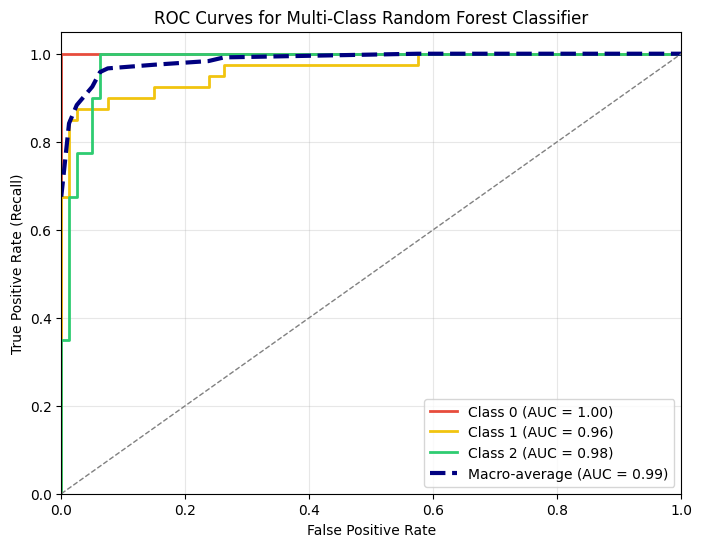

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# --- Predict probabilities for test set ---
y_proba = best_model.predict_proba(X_test)

# Binarize labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=best_model.classes_)
n_classes = y_test_bin.shape[1]
triage_palette = ['#E74C3C', '#F1C40F','#2ECC71'] #red, yellow and green

# --- Compute ROC curve and AUC for each class ---
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- Compute macro-average ROC curve ---
# Aggregate all FPR points
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Average it and compute AUC
mean_tpr /= n_classes
roc_auc["macro"] = auc(all_fpr, mean_tpr)

# --- Plot ---
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, color=triage_palette[i],
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot(all_fpr, mean_tpr, color='navy', lw=3, linestyle='--',
         label=f'Macro-average (AUC = {roc_auc["macro"]:.2f})')

plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curves for Multi-Class Random Forest Classifier')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# Model-level interpretation
Higher importance = the feature was more useful in splitting nodes across the forest.

Tells you globally which features the model relies on most.

                                             feature  importance
8                                         oxygen_sat    0.268541
4                                         heart_rate    0.141531
6                                       diastolic_bp    0.141058
3                                          resp_rate    0.126612
5                                        systolic_bp    0.124429
7                                        temperature    0.047657
0                                                age    0.029611
11                           mode_of_arrival_Walk-in    0.019173
23                                   AVPU_scale_Pain    0.018396
24                           AVPU_scale_Unresponsive    0.015109
10                   mode_of_arrival_Private vehicle    0.009807
1                                                sex    0.006996
15                             chief_complaint_Fever    0.006523
25                                  AVPU_scale_Voice    0.005637
16                       

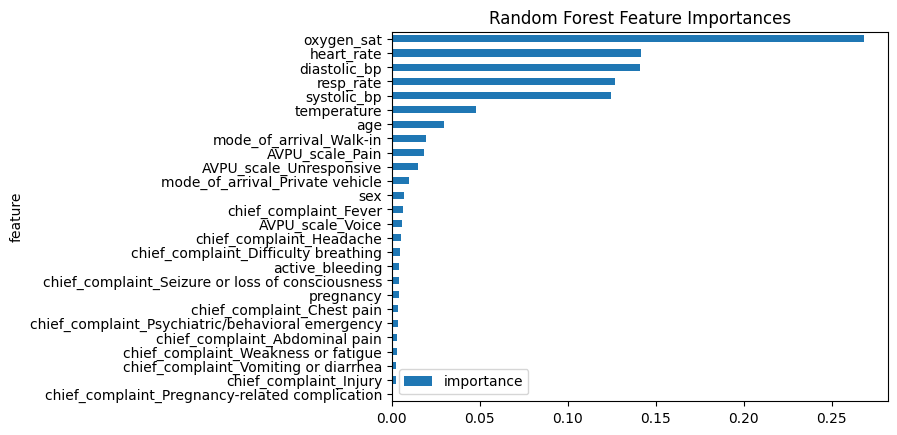

In [ ]:
# Feature importances
importances = best_model.feature_importances_
importance_df = pd.DataFrame({"feature": features.columns, "importance": importances})
print(importance_df.sort_values("importance", ascending=False))

# Plot
importance_df.set_index("feature").sort_values("importance").plot.barh()
plt.title("Random Forest Feature Importances")
plt.show()

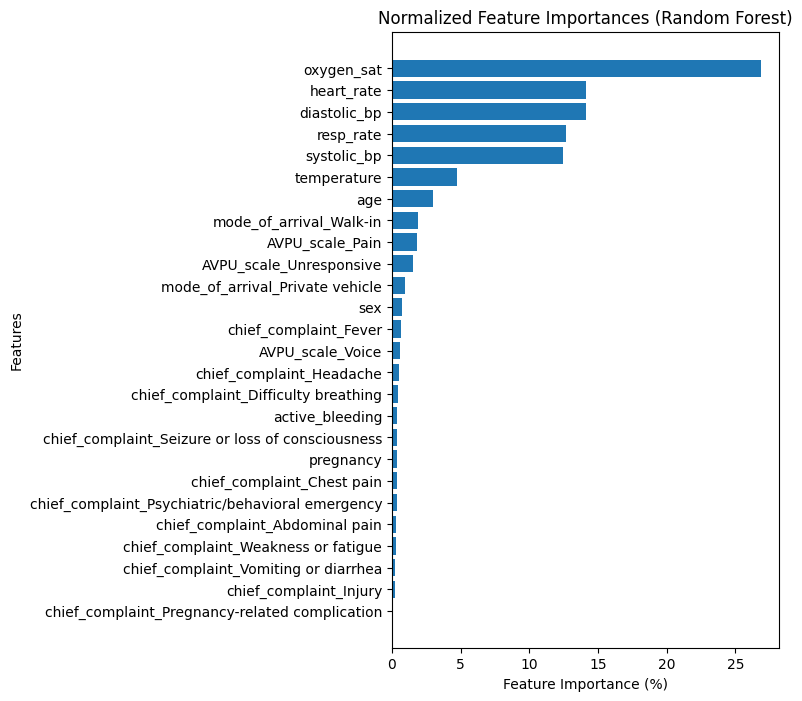

In [ ]:
importances = best_model.feature_importances_

# Normalize to percentage
importances_percent = 100 * (importances / importances.sum())

# Create a DataFrame
feat_importances = pd.DataFrame({
    'Feature': best_model.feature_names_in_,
    'Importance (%)': importances_percent
}).sort_values('Importance (%)', ascending=False)

# --- Plot ---
plt.figure(figsize=(5, 8))
plt.barh(feat_importances['Feature'], feat_importances['Importance (%)'])
plt.xlabel('Feature Importance (%)')
plt.ylabel('Features')
plt.title('Normalized Feature Importances (Random Forest)')
plt.gca().invert_yaxis()  # Highest on top
plt.show()


# Prediction-level interpretation

In [22]:
# Correct Prediction
trueclassified_idx = (y_test == y_pred_best)
trueclassified_samples = X_test[trueclassified_idx].copy()
trueclassified_samples['pred_labels'] = y_pred_best[trueclassified_idx]
trueclassified_samples['true_labels'] = y_test[trueclassified_idx]
trueclassified_samples.head()

,age,sex,active_bleeding,resp_rate,heart_rate,systolic_bp,diastolic_bp,temperature,oxygen_sat,pregnancy,...,chief_complaint_Pregnancy-related complication,chief_complaint_Psychiatric/behavioral emergency,chief_complaint_Seizure or loss of consciousness,chief_complaint_Vomiting or diarrhea,chief_complaint_Weakness or fatigue,AVPU_scale_Pain,AVPU_scale_Unresponsive,AVPU_scale_Voice,pred_labels,true_labels
179,53,1,0,25,95,114,87,38,92,0,...,0,1,0,0,0,0,0,0,0,0
183,24,1,1,25,103,139,80,38,89,0,...,1,0,0,0,0,0,0,0,0,0
223,75,1,1,16,84,121,80,37,97,0,...,0,0,0,0,0,1,0,0,1,1
422,60,0,0,17,67,117,73,37,98,0,...,0,0,0,0,0,0,0,0,2,2
281,35,0,1,18,82,122,78,37,94,0,...,0,0,0,0,0,0,0,0,1,1


In [ ]:
selected_row = trueclassified_samples.iloc[[2], :].copy()
selected_row.drop(columns=['pred_labels', 'true_labels'], inplace=True)
selected_row

,age,sex,active_bleeding,resp_rate,heart_rate,systolic_bp,diastolic_bp,temperature,oxygen_sat,pregnancy,...,chief_complaint_Headache,chief_complaint_Injury,chief_complaint_Pregnancy-related complication,chief_complaint_Psychiatric/behavioral emergency,chief_complaint_Seizure or loss of consciousness,chief_complaint_Vomiting or diarrhea,chief_complaint_Weakness or fatigue,AVPU_scale_Pain,AVPU_scale_Unresponsive,AVPU_scale_Voice
223,75,1,1,16,84,121,80,37,97,0,...,0,1,0,0,0,0,0,1,0,0


In [35]:
# define SHAP explainer
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
expected_list = explainer.expected_value.tolist()
shap_list = [shap_values[..., i] for i in range(shap_values.shape[-1])]

In [36]:
triage_names = X_test.columns
feature_names = np.array(triage_names)

In [20]:
# Assuming row_index is defined and triage_predictions is available
row_index_X_test = 2 # a correctly predicted label which has the index 2 in both the trueclassified sample and the X-test dataset
triage_predictions = best_model.predict_proba(X_test)

# Ensure the list of class names matches the order in rf_model.classes_
ordered_class_names = ['emergency', 'urgent', 'non-urgent']
class_labels_list = [f"{ordered_class_names[i].capitalize()} ({triage_predictions[row_index_X_test, i].round(2):.2f})" for i in range(len(best_model.classes_))]
print(class_labels_list)

['Emergency (0.06)', 'Urgent (0.65)', 'Non-urgent (0.29)']


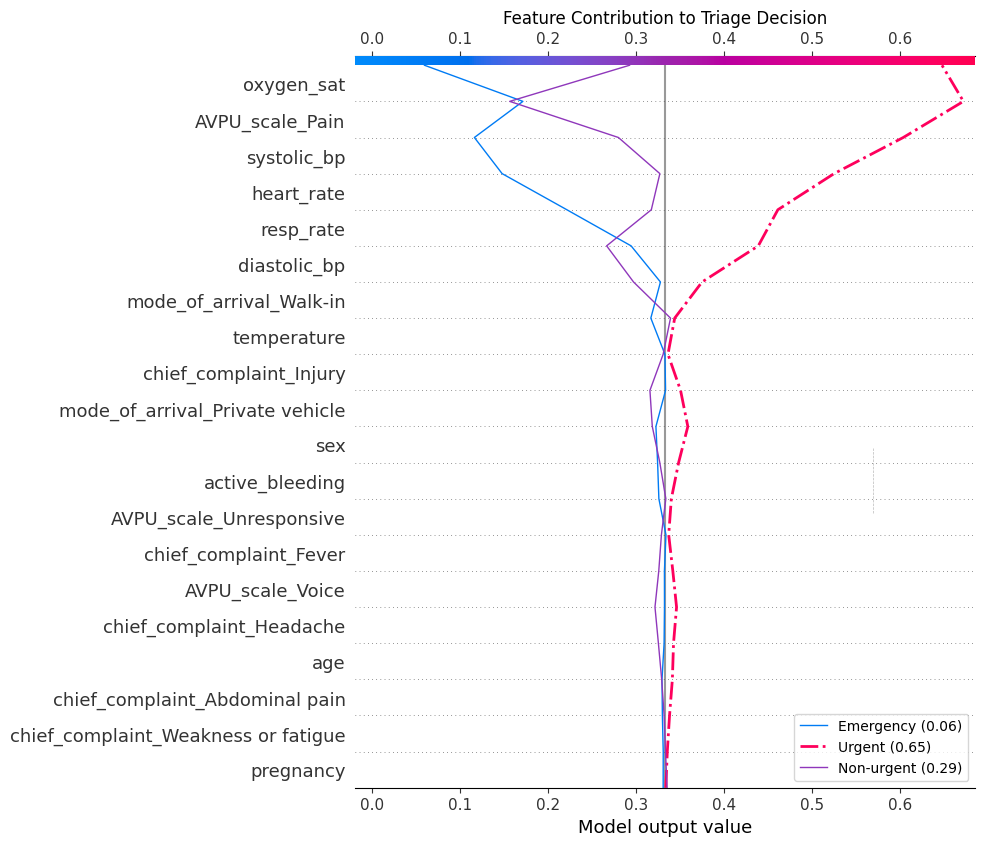

In [ ]:
# explain prediction number 2
shap.multioutput_decision_plot(
    expected_list,
    shap_list,
    row_index=row_index_X_test,
    features=selected_row.iloc[0,:],
    feature_names=feature_names,
    highlight=[np.argmax(triage_predictions[row_index_X_test])],
    legend_labels=class_labels_list,
    title='Feature Contribution to Triage Decision',
    legend_location="lower right",
)

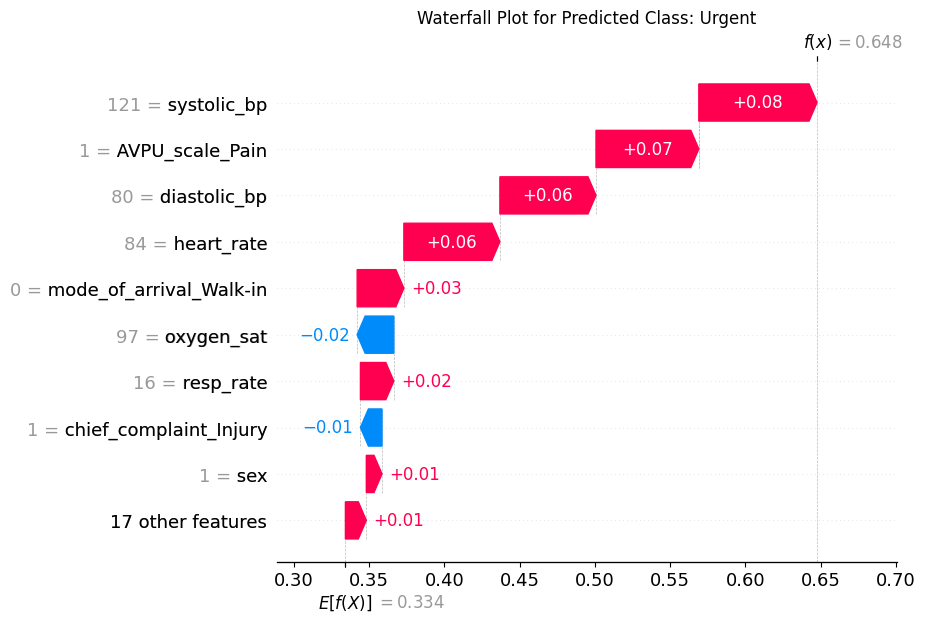

In [ ]:
predicted_label = trueclassified_samples.iloc[row_index_X_test, :]['true_labels']

# Get the SHAP values for the selected row across all classes using the positional index
shap_values_row_all_classes = shap_values[row_index_X_test, :, :] # Get all class SHAP values for the row

# Get the expected value for each class
expected_values = explainer.expected_value

# Define class names
ordered_class_names = ['Emergency', 'Urgent', 'Non-urgent']

# Generate waterfall plot for the predicted class
predicted_class_index = best_model.classes_.tolist().index(predicted_label)
predicted_class_shap_values = shap_values_row_all_classes[:, predicted_class_index] # SHAP values for the predicted class
predicted_class_expected_value = expected_values[predicted_class_index] # Expected value for the predicted class

# Create Explanation object for the predicted class
predicted_class_explanation = shap.Explanation(
    values=predicted_class_shap_values,
    base_values=predicted_class_expected_value,
    data=selected_row.iloc[0].values, # Pass feature values as a numpy array (1D)
    feature_names=feature_names
)

shap.waterfall_plot(predicted_class_explanation, show=False)
plt.title(f"Waterfall Plot for Predicted Class: {ordered_class_names[predicted_class_index]}")
plt.show()

# Misclassified Observation

In [7]:
misclassified_idx = (y_test != y_pred_best)
misclassified_samples = X_test[misclassified_idx].copy()
misclassified_samples['pred_labels'] = y_pred_best[misclassified_idx]
misclassified_samples['true_labels'] = y_test[misclassified_idx]
misclassified_samples

,age,sex,active_bleeding,resp_rate,heart_rate,systolic_bp,diastolic_bp,temperature,oxygen_sat,pregnancy,...,chief_complaint_Pregnancy-related complication,chief_complaint_Psychiatric/behavioral emergency,chief_complaint_Seizure or loss of consciousness,chief_complaint_Vomiting or diarrhea,chief_complaint_Weakness or fatigue,AVPU_scale_Pain,AVPU_scale_Unresponsive,AVPU_scale_Voice,pred_labels,true_labels
325,48,1,0,12,92,112,76,37,97,0,...,0,0,0,0,1,0,0,0,2,1
433,51,0,0,18,71,110,78,36,96,0,...,0,0,0,0,1,0,0,0,1,2
267,78,1,0,16,77,116,74,37,98,0,...,0,0,0,0,0,0,0,0,2,1
289,63,1,0,20,70,111,73,37,98,0,...,0,0,0,0,1,0,0,0,2,1
363,74,0,0,21,80,118,77,37,97,0,...,0,0,1,0,0,0,0,0,2,1
196,22,0,1,14,102,120,83,38,94,0,...,0,0,0,0,0,0,0,0,1,0
394,72,0,0,18,95,115,69,37,97,0,...,0,0,0,0,0,0,0,0,2,1


In [ ]:
# misclassified observation
X_test.index.to_list()[108]

394

In [39]:
# the misclassified observation has the row index 394 in the triage dataset but the index 108 in the X_test dataset and the index 6 in the misclassified sample
misclassified_row = misclassified_samples.iloc[[6], :].copy()
misclassified_row.drop(columns=['pred_labels', 'true_labels'], inplace=True)
misclassified_row

,age,sex,active_bleeding,resp_rate,heart_rate,systolic_bp,diastolic_bp,temperature,oxygen_sat,pregnancy,...,chief_complaint_Headache,chief_complaint_Injury,chief_complaint_Pregnancy-related complication,chief_complaint_Psychiatric/behavioral emergency,chief_complaint_Seizure or loss of consciousness,chief_complaint_Vomiting or diarrhea,chief_complaint_Weakness or fatigue,AVPU_scale_Pain,AVPU_scale_Unresponsive,AVPU_scale_Voice
394,72,0,0,18,95,115,69,37,97,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Assuming row_index is defined and triage_predictions is available
row_index_X_test = 108 # Example row_index, adjust as needed
triage_predictions = best_model.predict_proba(X_test)
# Ensure the list of class names matches the order in rf_model.classes_
ordered_class_names = ['emergency', 'urgent', 'non-urgent']
class_labels_list = [f"{ordered_class_names[i].capitalize()} ({triage_predictions[row_index_X_test, i].round(2):.2f})" for i in range(len(best_model.classes_))]
print(class_labels_list)

['Emergency (0.02)', 'Urgent (0.26)', 'Non-urgent (0.73)']


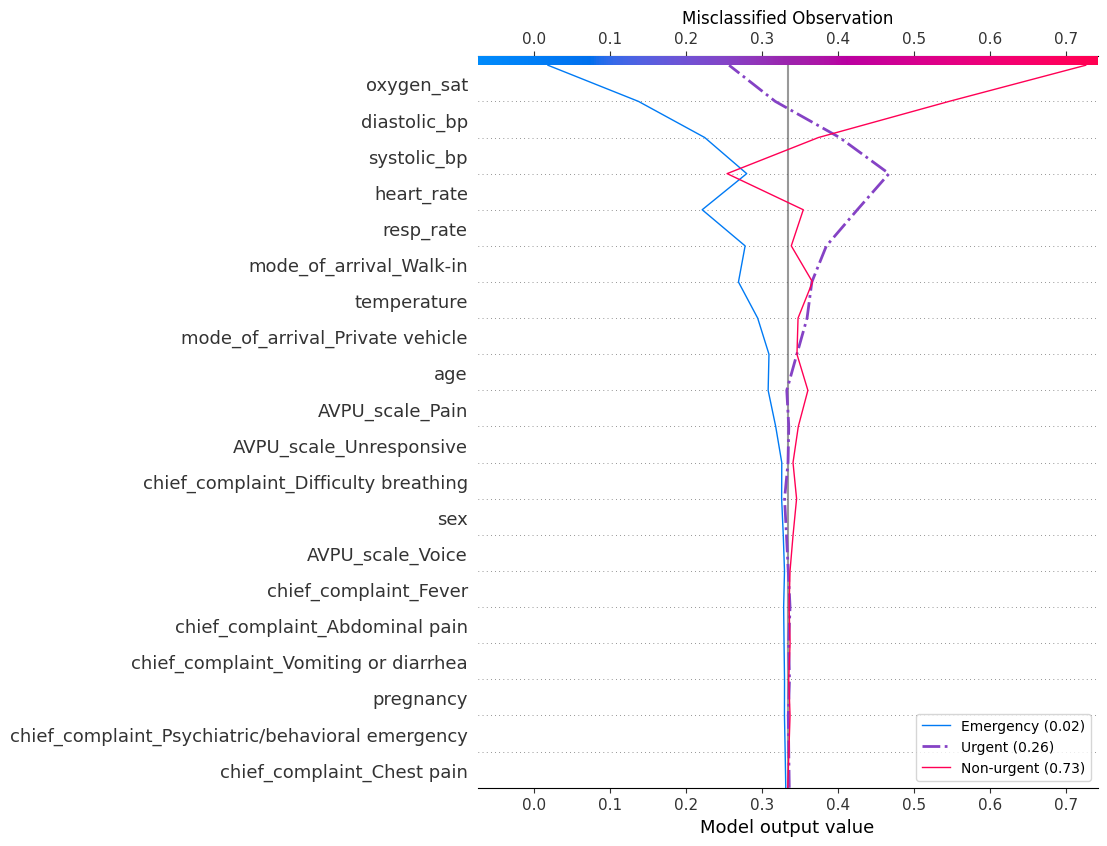

In [ ]:
shap.multioutput_decision_plot(
    expected_list,
    shap_list,
    row_index=row_index_X_test,
    feature_names=feature_names,
    # highlight=[np.argmax(triage_predictions[row_index])],
    highlight=1,  # highlight the true class
    legend_labels=class_labels_list,
    title = 'Misclassified Observation',
    legend_location="lower right",
)

In [33]:
misclassified_samples.iloc[6, :]

,394
age,72
sex,0
active_bleeding,0
resp_rate,18
heart_rate,95
systolic_bp,115
diastolic_bp,69
temperature,37
oxygen_sat,97
pregnancy,0


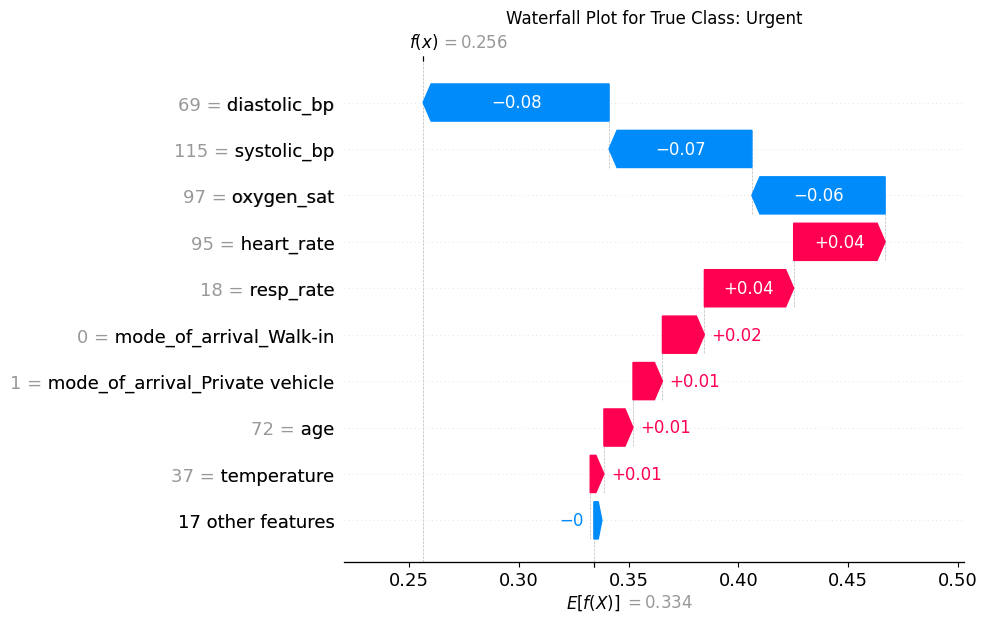

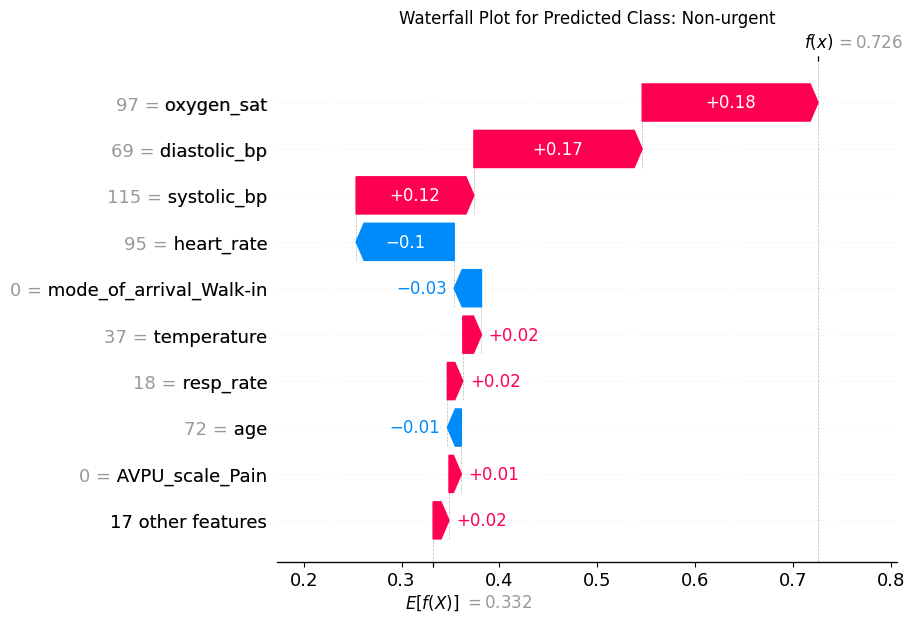

In [42]:
misclassified_index = 6
predicted_label = misclassified_samples.iloc[misclassified_index, :]['pred_labels']
true_label = misclassified_samples.iloc[misclassified_index, :]['true_labels']

# Get the SHAP values for the selected row across all classes using the positional index
shap_values_row_all_classes = shap_values[row_index_X_test, :, :] # Get all class SHAP values for the row

# Get the expected value for each class
expected_values = explainer.expected_value

# Define class names
ordered_class_names = ['Emergency', 'Urgent', 'Non-urgent']

# Generate waterfall plot for the true class
true_class_index = best_model.classes_.tolist().index(true_label)
true_class_shap_values = shap_values_row_all_classes[:, true_class_index] # SHAP values for the predicted class
true_class_expected_value = expected_values[true_class_index] # Expected value for the predicted class

# Create Explanation object for the predicted class
true_class_explanation = shap.Explanation(
    values=true_class_shap_values,
    base_values=true_class_expected_value,
    data=misclassified_row.iloc[0].values, # Pass feature values as a numpy array (1D)
    feature_names=feature_names
)

shap.waterfall_plot(true_class_explanation, show=False)
plt.title(f"Waterfall Plot for True Class: {ordered_class_names[true_class_index]}")
plt.show()

# Generate waterfall plot for the predicted class
predicted_class_index = best_model.classes_.tolist().index(predicted_label)
predicted_class_shap_values = shap_values_row_all_classes[:, predicted_class_index] # SHAP values for the predicted class
predicted_class_expected_value = expected_values[predicted_class_index] # Expected value for the predicted class

# Create Explanation object for the predicted class
predicted_class_explanation = shap.Explanation(
    values=predicted_class_shap_values,
    base_values=predicted_class_expected_value,
    data=misclassified_row.iloc[0].values, # Pass feature values as a numpy array (1D)
    feature_names=feature_names
)

shap.waterfall_plot(predicted_class_explanation, show=False)
plt.title(f"Waterfall Plot for Predicted Class: {ordered_class_names[predicted_class_index]}")
plt.show()